In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [76]:
df = pd.read_csv(r'C:\Users\Phillip\Desktop\Python\Datasets\AirPassengers.csv')
df.columns = ['Date', 'Number of Passengers']
df['Date'] = pd.to_datetime(df['Date'])

# Initial Visualisations

Matplotlib Plotting is lower level than Pandas which does more work under the hood
    - e.g., plt.fillbetween() cannot plot df['Date'] as it is a datetime object
    - must convert to numeric values first


(-800.0, 800.0)

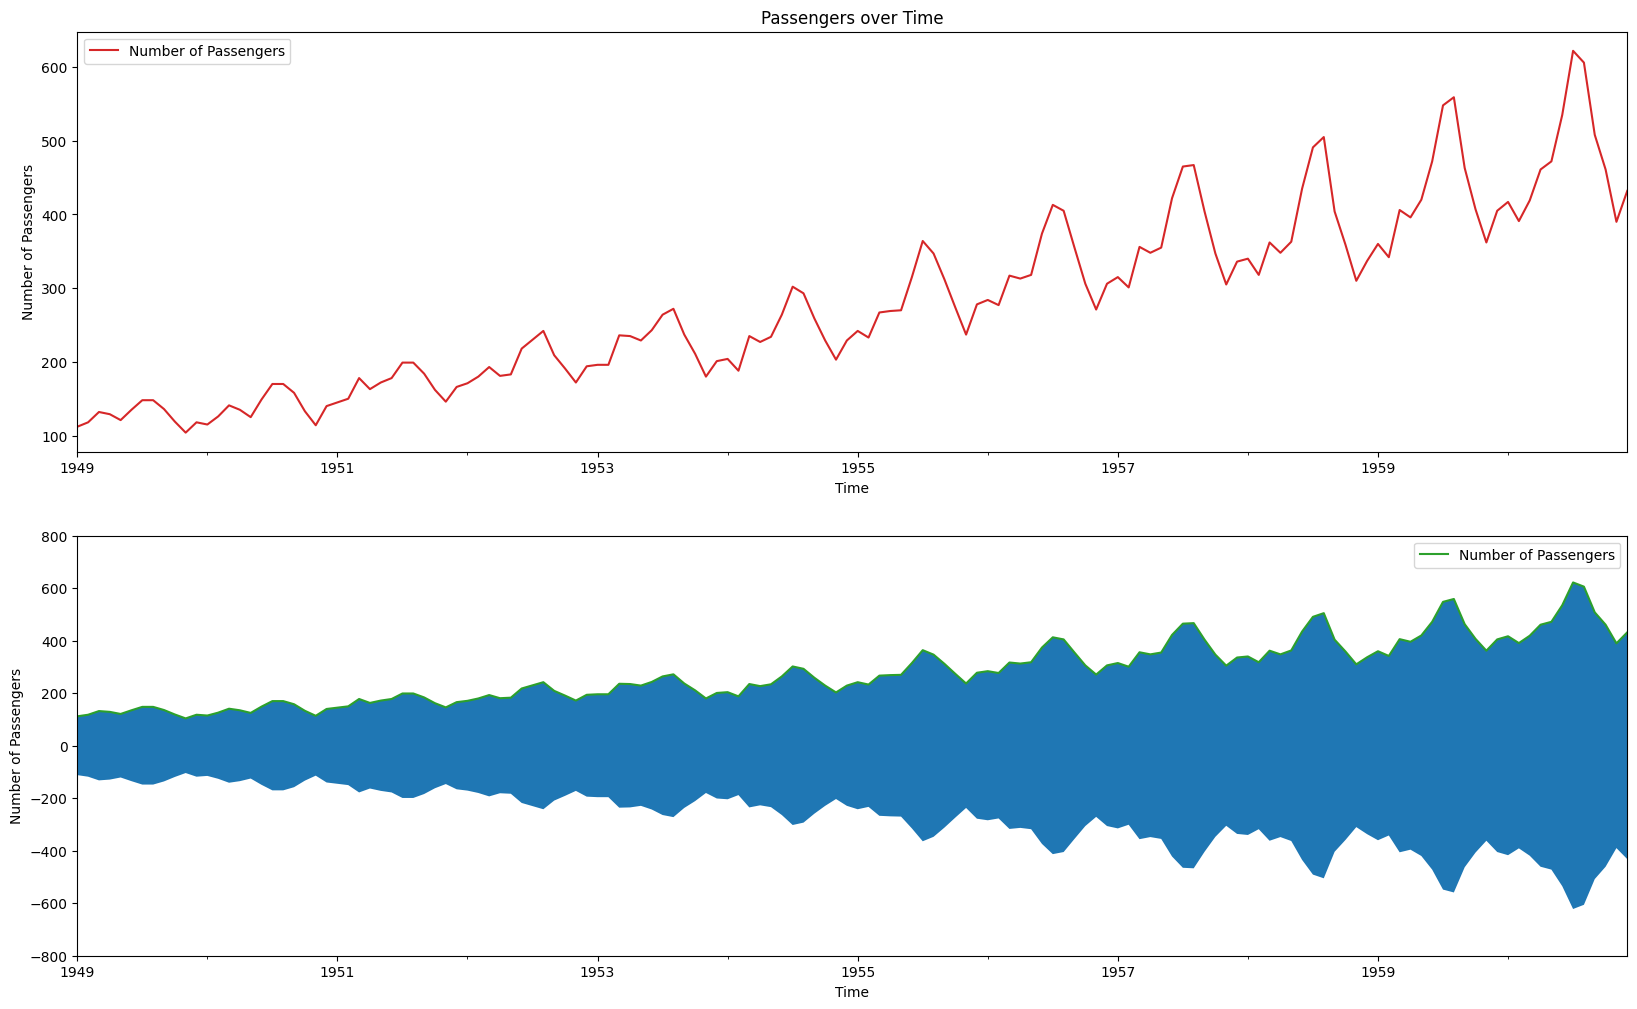

In [88]:
''' 

To plot using Pandas but still be able to manipulate the fig using matplot:
    Create fig, ax object using plt.subplots, then assign the Pandas plot
    to that ax object by setting ax = ax 

To make changes for a specific subplot, e.g., to set ylim for 2nd plot
    ax2.set_ylim()

To plot reflection use plt.fill_between()
    plt.fill_between(x = x data,y1 = first function, y2 = 2nd function)
    Other arguments include:
        - alpha 
        - linewidth
        - color
'''

fig, axs = plt.subplots(figsize=(20,12), nrows=2, ncols = 1)
ax1, ax2 = axs.ravel()
#Making Sure
#Normal Plot
df.plot.line('Date','Number of Passengers',
             color='tab:red',
             title='Passengers over Time', xlabel='Time',
             ylabel='Number of Passengers', ax = ax1)
#Double Y-axis Plot 
df.plot.line('Date', 'Number of Passengers', ax = ax2,
             color='tab:green', xlabel ='Time',
             ylabel = 'Number of Passengers')

#Convert data into numeric values
x = df['Date'].values
plt.fill_between(x = x, y1 = df['Number of Passengers'],
                 y2 = -df['Number of Passengers'])

ax2.set_ylim(-800, 800)

# Decomposing a Time Series

Time Series visualisation can show 5 components
    1. Base level
    2. Trends
    3. Seasonality (trends that repeat with respect to something)
    4. Cyclicality (trends with no set frequency)
    5. Error

These effects can be combined (when modelling) either multiplicatively or additively e.g., 

**Additive time series:**

Value = Base Level + Trend + Seasonality + Error


**Multiplicative Time Series:**

Value = Base Level x Trend x Seasonality x Error

We can choose via statsmodel how to decompose these effects 

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [157]:
#Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'],
                                                  model = 'multiplicative',
                                                  period = 30)
#Additive 
additive_decomposition = seasonal_decompose(df['Number of Passengers'],
                                            model = 'additive',
                                            period = 30)

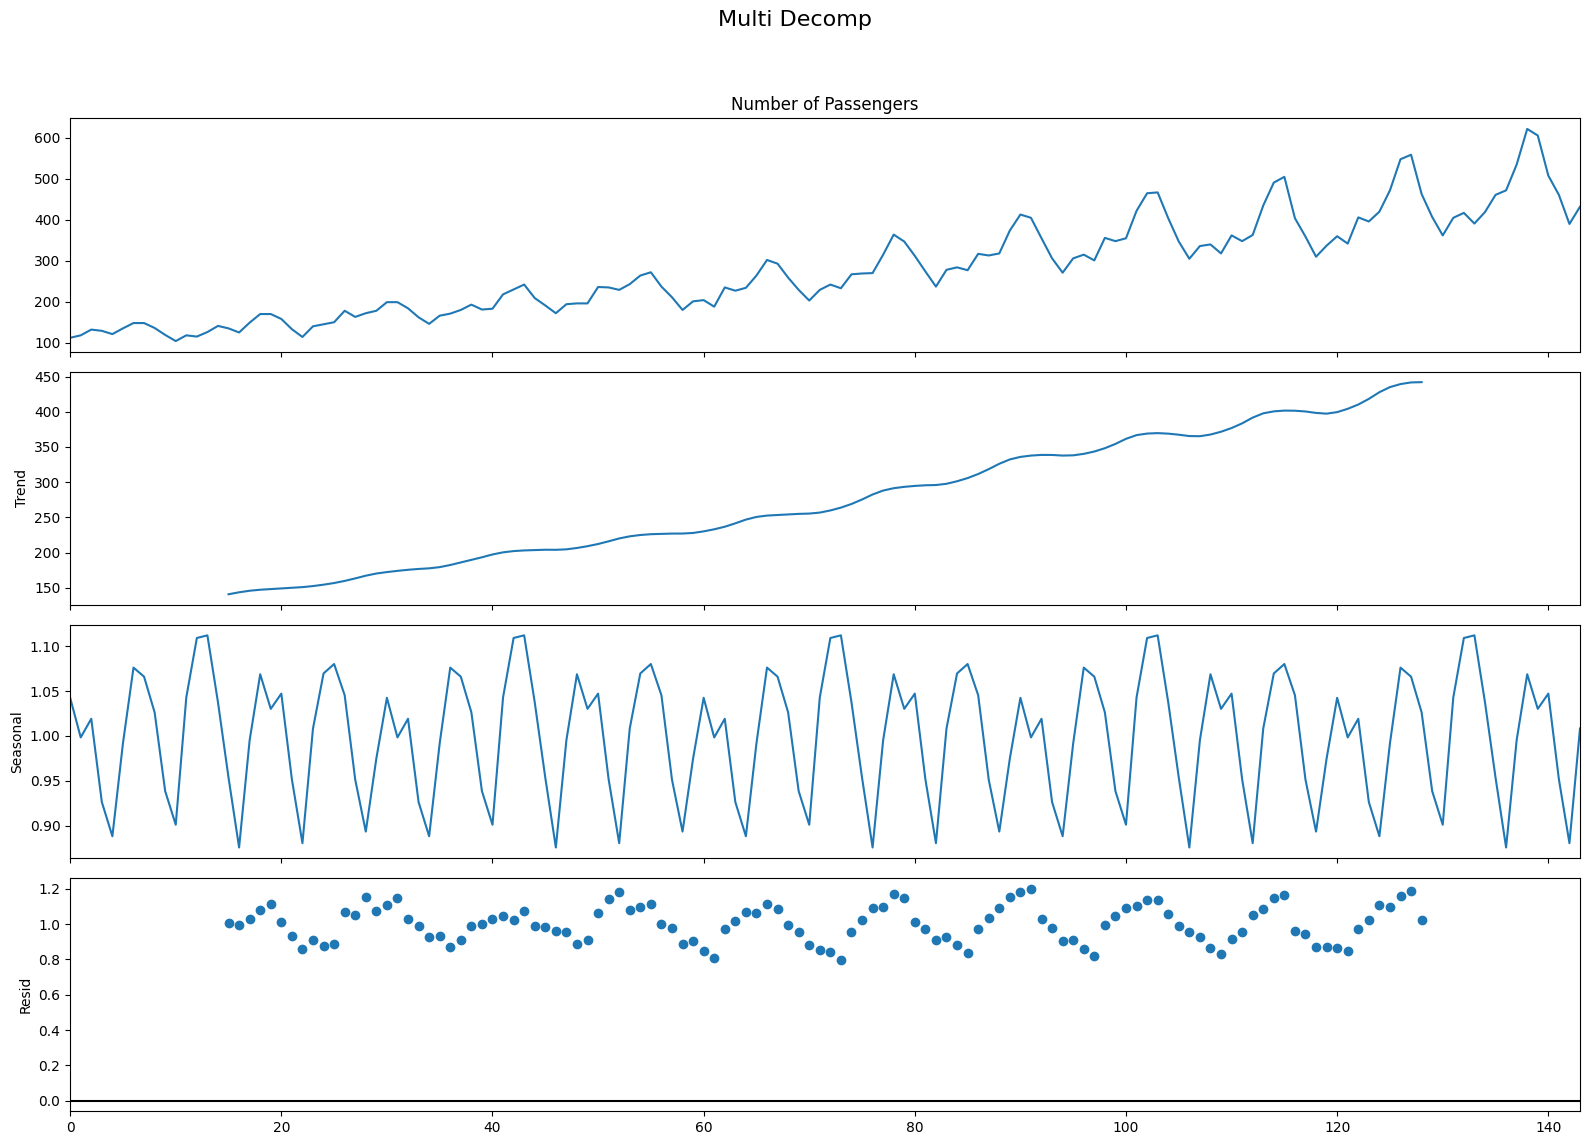

In [158]:
'''
RC Params 
    - plt.rcParams behave like dictionary
    - Common keys are 
        1. figure.figsize
        2. axes.labelsize
        3. lines.linesize
    - to update RCparams use plt.rcParams.update( {dictionary} )

Tight_layout(pad, h_pad, w_pad, rect)
    - Automatically adjusts parameters to ensure axes labels, titles, etc fit all subplots
    - pad : padding between figure edge and subplot edge 
    - h_pad, w_pad : padding between edges of subplots
    - rect : rectangle in normalised figure coordinaties (0 to 1) where subplot will fit
        - rect = (left, bottom, right, top)
 '''
plt.rcParams.update({'figure.figsize' : (16,12)})
multiplicative_decomposition.plot().suptitle('Multi Decomp', fontsize = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


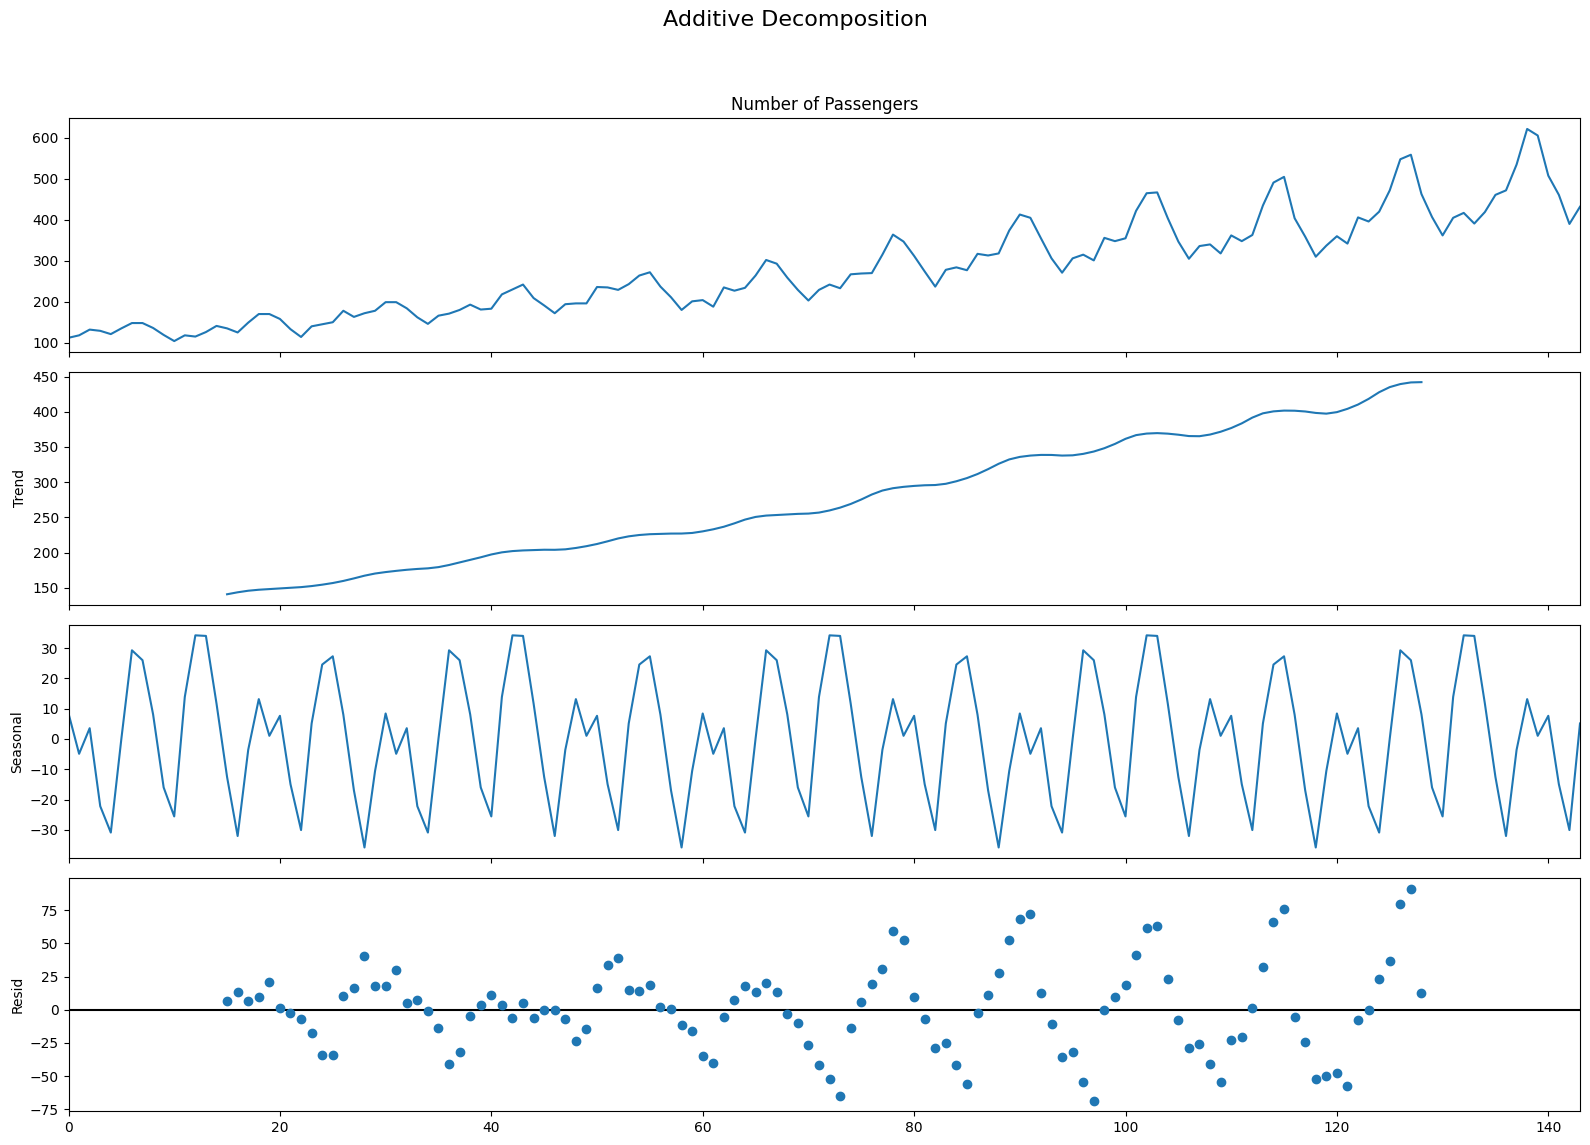

In [159]:
#Additive
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Statsmodel's seasonal decompose breaks down time series well for us. We see residuals for additive has a pattern which is not good whereas multiplicative's residuals are seemingly quite random

# Transformations to make Time series stationary

Transformations to do this include
1. Differencing 
2. Taking Logs or Nth roots
3. Combination 


## Stationarity vs Non-Stationarity in Processes

Must make sure we use stationary data (unless cointegration)

Text(0.5, 1.0, 'Non-Stationary Trend')

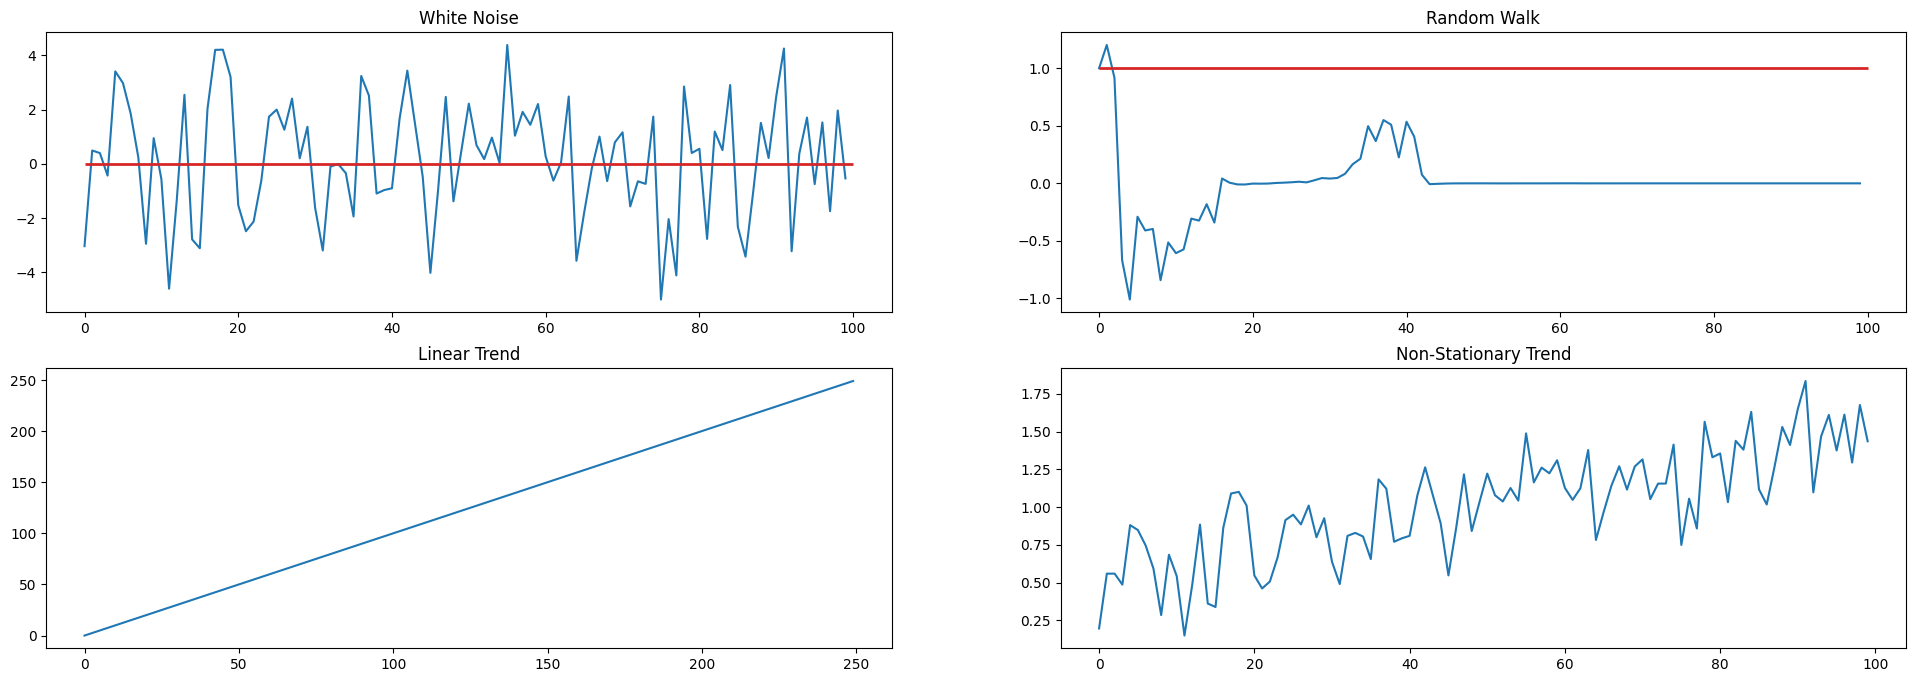

In [253]:
''' Creating Synthetic Data to show diffrence between stationary, trends, and other process'''

#Create Plots
fig, axs = plt.subplots(2,2, figsize=(24,8), dpi = 100)
ax1, ax2, ax3, ax4 = axs.ravel()

#Stationary Data (White Noise)
stationary_process = np.random.normal(0, 2, 100)
ax1.plot(np.arange(0, 100), stationary_process)
ax1.set_title(label = 'White Noise')
ax1.hlines(y=0, xmin = 0, xmax= 100, color = 'tab:red', linewidth=2)

#Random Walk (Non-Stationary)
drift = .1  
volatility = 0.1  
n = 100            
r_walk = np.random.normal(loc=(1 + drift)**(1/n), 
                          scale=volatility * np.sqrt(n), 
                          size=n)
r_walk[0] = 1
random_walk = r_walk.cumprod()
ax2.plot(np.arange(100), random_walk)
ax2.hlines(y=1, xmin = 0, xmax= n, color = 'tab:red', linewidth=2)
ax2.set_title(label = 'Random Walk')

#Trend (Linear)
ax3.plot(np.arange(0,250), np.arange(0,250))
ax3.set_title(label = 'Linear Trend')

#Non-Stationary Trend 
trend_coeff = 0.1
constant = 0.5
non_stationary_trend = constant + 0.01 * np.arange(0,100) + trend_coeff * stationary_process
ax4.plot(np.arange(0,100), non_stationary_trend)
ax4.set_title(label = 'Non-Stationary Trend')